# Module 03: Divide and Conquer

CSCI304: Analysis and Design of Algorithms<br>
Nile University<br>
Ammar Sherif

## Review
- Empirical Analysis
- Correctness Proofs and Complexity Analysis
- Brute Force Algorithms

## Outline
- [Divide and Conquer Paradigm](#Divide-and-Conquer-Paradigm)
    - [Example 1: Factorial](#Example-1:-Factorial)
- [How to Design Recursive Algorithms](#How-to-Design-Recursive-Algorithms)
    - [Example 2: Maximum Item](#Example-2:-Maximum-Item)
    - [Example 3: Search a List](#Example-3:-Search-a-List)
- [Complexity Analysis for Recursive Algorithms](#Complexity-Analysis-for-Recursive-Algorithms)
    - [Guess and Prove](#Guess-and-Prove)
    - [Recursion-Tree](#Recursion-Tree)
    - [Master-Method](#Master-Method)
        - [Examples](#Examples)
- [Tower of Hanoi](#Tower-of-Hanoi)
    - [Empirical Analysis](#Empirical-Analysis)
    - [Straightforward Complexity Analysis](#Straightforward-Complexity-Analysis)
    - [Complexity Analysis using Recursion Tree](#Complexity-Analysis-using-Recursion-Tree)
- [References and Further Readings](#References-and-Further-Readings)

## Divide and Conquer Paradigm
The idea is that we have a hard problem that we do not know for sure how to tackle; therefore, we try to divide it into simpler problems, solve them, and merge the solutions to provide the solution to the original problem. This requires some properites we have to spot regarding our problem:
- The problem could be divided into smaller problems of the *same type*
- We can solve these smaller problems at a particular level
- Given the solution of these smaller problems, we could combine them to provide the solution of the bigger problem

If that happens to hold in our problem, we use the below paradigm:<br>
<center><img src="./images/divide_conquer.svg"></center>

### Example 1: Factorial
We know that
\begin{align*}
    n! &= n \times \overbrace{(n-1) \times (n-2) \times \cdots \times 2 \times 1}^{(n-1)!}\\
    &= \boxed{n \times (n-1)!}\\
    0! &= 1! = 1
\end{align*}

In [1]:
def fact(n): # T(n)
    """
    This function computes the value of factorial n (n!)
    
    Input:
    - n: the integer for which we want to compute the factorial
         it is at least 0 (n>=0)
    """
    if n == 0:   # a
        return 1 # b
    else:        # d
        return n * fact(n-1) # e + T(n-1)
#         return max(fact(n-1),fact(n-2)) # max(T(n-1),T(n-2)) ? T(n-1) + T(n-2)

In [2]:
fact(5)

120

To compute the time consumed by the algorithm theoretically, we might proceed as follows: 
\begin{align*}
    \text{Time } (T_n) &: \text{denotes the time our function takes to compute $n!$}\\
    \implies T_{n-1} &: \text{denotes the time our function takes to compute $(n-1)!$}\\
    T_n &= \underbrace{c}_{\text{multiplication and condition}} + \underbrace{T_{n-1}}_{\text{recursive call}}\\
    &= c + \left( c + T_{n-2}\right) = 2 c + T_{n-2}\\
    &= 2c + (c + T_{n-3}) = 3c + T_{n-3}\\
    &\ \vdots\\
    &= (i-1)c + (c + T_{n-i}) = i c + T_{n-i}\\
    &= c n + T_{0} = c n + a\\
    &= \boxed{\mathcal{O}(n)}
\end{align*}

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time

In [4]:
times = []
for i in range(1,100):
    start_time = time.time()
    fact(i)
    times.append( (time.time() - start_time)*(10**9) )

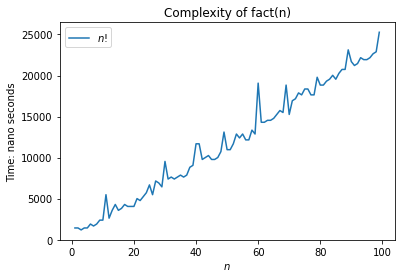

In [5]:
# the code to plot the curve

f,ax = plt.subplots()
ax.plot(range(1,100),times,label='$n!$')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of fact(n)')
ax.legend(loc=0);

## How to Design Recursive Algorithms

Here, we mention some useful guidelines to develop a recursive solution to a general problem. To do it, it would be helpful to remember the **Strong Induction** proof technique. In general, we would like to build two cases: the **base case** and the **recursive** one. To do so, we follow the below steps.

### Step 1: problem size
Recursive algorithms take a problem and try to solve it recursively by **decreasing the problem size** at each step. Therefore, before doing anything, you need to know what your **problem size** is. Is it your array size? simply the value of the input? a number of characters? or what exactly? 

### Step 2: define your base case
We mentioned above that we need to solve the generated problems through recursion at some level, as otherwise, we would just recursively call infinitely. That level is the **base case**, just like in inductive proofs, which is simply a problem with a size that we can directly *solve without recursion*.

Therefore, knowing your problem size, we next think about **in which size**, or *at which level*, can we solve our problem directly? After determining that, we write down the *code to solve* the problem in such a case, under the base case. We assume that size is $\boxed{k}$ in our general implementation.

### Step 3: define your recursive case
In such a step, we would like to **divide the problem** into a group of smaller problems that we tackle. Then, we **merge** their solutions to get the solution to the problem we want. This is very similar to the **inductive step** in induction proofs, Module 2, so we also tackle it in the same manner.

- Assume we **know the solution** to all the problems of size $1, \cdots, n-1$. How could we merge a **group of them** to solve the problem of size $n$. Knowing this is the recursive case.
- **Note**: to design more **efficient** algorithm, you might want to think how to combine solutions whose sizes are proportional to the current problem size. These are of the form of $\boxed{n/b}$ rather than $\boxed{n-b}$, assuming we can represent it using that of course. This is not guaranteed to always provide a more efficient version than using $n-b$, yet it might be in various cases.

Now, our rescursive function $F$ would be as below

F$(n)$: <br>
$\quad$**if** $n \leq k$ **then**<br>
$\quad$$\quad$ # the code to solve the **base case** from step 2<br>
$\quad$**else**<br>
$\quad$$\quad$# **recursive** step: the code from step 3<br>
$\quad$$\quad$# write down your code that merges the solution using the previous solutsions<br>
$\quad$**endif**

### Example 2: Maximum Item

We have a list, and we want to find the maximum item in that list. We apply each step as below:

- Step 1: What is the problem size? <br>
  As we can see our problem size is the number of items inside the list. It takes values from $1, \cdots, n$. We represent the problem size using two parameters $s$, starting index, and $e$, ending index, where $e-s+1 = n$. The 1 is due to counting *inclusive* items. 
- Step 2: At what level we can solve our problem without recursion?<br>
    We know if we had one item, then it is the maximum. The base case is when $\boxed{n=1} \equiv \boxed{e=s}$. The code is to just return that single item
- Step 3: Assuming we know the maximum items in the lists having up to $n-1$ items<br> how can we merge them to solve the problem of having $n$ items?<br> We have two approaches:
    - we know max$(a_1,\cdots,a_{n})$ = max$(a_n,$max$(a_1,\cdots,a_{n-1}))$
    - we could think in another approach max$(a_1,\cdots,a_{n})$ = max$($ max$(a_1,\cdots,a_{\lfloor n/2 \rfloor}),$ max$(a_{\lfloor n/2\rfloor+1},\cdots,a_{n}))$



In [6]:
def max1(A,s,e):
    """
    ==================================================================
    This function computes the maximum value in the list of items from
    A[s] to A[e]
    ------------------------------------------------------------------
     Inputs:
    -     A: The list of items
    -     s: the starting index
    -     e: the ending index
    
    Outputs:
    -     m: the maximum value in {A[s],A[s+1],...,A[e]}
    ==================================================================
    """
    # ================================================================
    # First, we write down our base case
    # ================================================================
    if s == e:
        # ------------------------------------------------------------
        # The list contains one item, so we return it
        # ------------------------------------------------------------
        return A[s]
    else:
        # ------------------------------------------------------------
        # Otherwise, the recursive step
        # ------------------------------------------------------------
        return max(A[e], max1(A,s,e-1) )
        # ------------------------------------------------------------
        # Alternatively, we might increment s
        # return max(A[s], max1(A,s+1,e) )
        # ------------------------------------------------------------

In [7]:
def max2(A,s,e):
    """
    ==================================================================
    This function computes the maximum value in the list of items from
    A[s] to A[e]
    ------------------------------------------------------------------
     Inputs:
    -     A: The list of items
    -     s: the starting index
    -     e: the ending index
    
    Outputs:
    -     m: the maximum value in {A[s],A[s+1],...,A[e]}
    ==================================================================
    """
    # ================================================================
    # First, we write down our base case
    # ================================================================
    if s == e:
        # ------------------------------------------------------------
        # The list contains one item, so we return it
        # ------------------------------------------------------------
        return A[s]
    else:
        # ------------------------------------------------------------
        # Otherwise, the recursive step
        # ------------------------------------------------------------
        
        # ------------------------------------------------------------
        # Compute the index of the middle from s to e. This is not e/2
        # ------------------------------------------------------------
        midIdx = s+( (e-s)//2 ) 
        return max( max2(A,s,midIdx) , max2(A,midIdx+1,e) )

In [8]:
def max3(A):
    """
    ==================================================================
    This function computes the maximum value in <A>
    ------------------------------------------------------------------
     Inputs:
    -     A: The list of items
    
    Outputs:
    -     m: the maximum value in {A[0],A[1],...,A[n-1]}
    ==================================================================
    """
    # ================================================================
    # First, we write down our base case
    # ================================================================
    if len(A) == 1:
        # ------------------------------------------------------------
        # The list contains one item, so we return it
        # ------------------------------------------------------------
        return A[0]
    else:
        # ------------------------------------------------------------
        # Otherwise, the recursive step
        # ------------------------------------------------------------
        # Here we do the same thing, yet with no indices. We generate
        # two lists and pass them to our function.
        # ------------------------------------------------------------
        split = len(A)//2
        
        
        # ============================================================
        # Notice generating structures within  recursive procedures is
        # not a good thing in terms of memory consumption by your alg-
        # orithm. That is why we focus on using indices, instead.
        # ============================================================
        A1 = A[:split]
        A2 = A[split:]
        # ------------------------------------------------------------
        # Now, get  the maximum in each  list individually,  and merge
        # the results.
        # ------------------------------------------------------------
        a = max3(A1)
        b = max3(A2)
        
        return a if a> b else b

In [9]:
A = [1,20,3,-400,5,-6000,7,8,-900]
s = 0
e = len(A)-1
print(" First implementation:", max1(A,s,e))
print("Second implementation:", max2(A,s,e))
print(" Third implementation:", max3(A))

 First implementation: 20
Second implementation: 20
 Third implementation: 20


#### Missing Base Cases

After applying the 3 steps, previously discussed, we see we might end up with different sorts of algorithms that does the same thing. For example, what if we wanted to divide them into $\frac{n}{3},\frac{n}{3},\frac{n}{3}$. I am mentioning this particular case to let you notice something. **What if we actually missed a base case?**

In the below code we actually did the same thing, yet we encoutered a special size while doing the recursion. We found an empty lists. The recursion will not end in such case. For that reason, we would like to return something that should be very unfavorable while merging. Because we are finding the maximum, we simply return $\boxed{-\infty}$, so any other value will be larger than it.

In [10]:
def max4(A,s,e):
    """
    ==================================================================
    This function computes the maximum value in the list of items from
    A[s] to A[e]
    ------------------------------------------------------------------
     Inputs:
    -     A: The list of items
    -     s: the starting index
    -     e: the ending index
    
    Outputs:
    -     m: the maximum value in {A[s],A[s+1],...,A[e]}
    ==================================================================
    """
    # ================================================================
    # First, we write down our base case
    # ================================================================
    # Step 2
    N = e-s+1
    if N==1:
        return A[s]
    # ================================================================
    # NOTE Because we sometimes  encounter empty lists,  we would like
    #      to return a very unfavorable quantity. Because we are find-
    #      ing the maximum, we simply return negative infinity; there-
    #      fore, this partition will not be considered.
    # ================================================================
    elif N==0:
        return -1*np.inf
    # ================================================================
    # Step 3: The recursive case
    # ================================================================
    split1 = s + N//3
    split2 = s + 2*N//3
    
    # ================================================================
    # Find the maximum of each sub-list
    # ================================================================
    a = max4(A,s,split1-1)
    b = max4(A,split1,split2-1)
    c = max4(A,split2,e)
    
    # ================================================================
    # return the maximum value in the three.
    # ================================================================
    return max(a,b,c)

In [11]:
A = [1,20,3,-400,5,-6000,7,8,-900]
s = 0
e = len(A)-1
print(" First implementation:", max1(A,s,e))
print("Second implementation:", max2(A,s,e))
print(" Third implementation:", max3(A))
print("Fourth implementation:", max4(A,s,e))

 First implementation: 20
Second implementation: 20
 Third implementation: 20
Fourth implementation: 20


### Example 3: Search a List

We have a list, and we want to find the index of an item if it exists. Otherwise, we return -1. To approach such problem, we simply design our solution to return True if it exists and False, otherwise. Then, we try to modify such algorithm to return the indices, instead.

- **Step 1**: again, like before, what is the input/problem size? What is the main contributor for the dificulty of the problem? It is the **number of elements** in the array. We, again, use to indices $s$ and $e$ to represent it as before
- **Step 2**: At what level we can solve our problem without recursion? What is the smallest size where we can easily know whether the list includes an item or not?<br>It is at $n=1$. In such case, having one element, you can easily know if this element is the one you search about or not.<pre>return A[s] == v</pre>
- **Step 3**: Assuming we know the solution in every list having up to $n−1$ items, how can we merge them to solve the problem of having $n$ items?<br>Again, we can simply divide the array into two, search for the first and the second halves. Then, return the union of the results. Please, check out the code below:

In [12]:
def our_find(A,s,e,v):
    """
    ==================================================================
    This function searches an array <A> for an element  <v> within the
    range of  [s-e]  inclusive. It returns  True  when found and False 
    otherwise.
    ------------------------------------------------------------------
     Inputs:
    -     A: the list of items
    -     s: the starting index
    -     e: the ending index
    -     v: the value we search for
    
    Outputs:
    - found: True if the value in {A[s],...,A[e]} and False otherwise
    ==================================================================
    """
    # ================================================================
    # First, we write down our base case
    # ================================================================
    # Step 2: given the inclusiveness, we have one element when s==e
    if s==e:
        return A[s]==v
    # ================================================================
    # Step 3: The recursive case
    # ================================================================
    mid_index = (s + e)//2
    
    # ----------------------------------------------------------------
    # Find the element of each sub-lists, and  return the union of the
    # results. This is the or operator.
    # ----------------------------------------------------------------
    found = our_find(A,s,mid_index,v) or our_find(A,mid_index+1,e,v)
    
    # ================================================================
    # return the maximum value in the three.
    # ================================================================
    return found

In [13]:
A = [1,20,3,-400,5,-6000,7,8,-900,9]
s = 0
e = len(A)-1
v = 5
print("Found (5):", our_find(A,s,e,v))
print("Found (6):", our_find(A,s,e,v+1))

Found (5): True
Found (6): False


<div class="alert alert-block alert-info">
<b>Mini-Exercise:</b> modify the above recursive function to return the index, instead of just True, False
</div>

## Complexity Analysis for Recursive Algorithms
To find the complexity of a recursive algorithm, we have various options:
- **Guess** a bound, and prove it [Induction would be very helpful]
- **Recursion-tree**: expands the time costs per level in the recursion tree, and sum all the costs to compute the overall time
- **Master** method: we will see it later on

### Guess and Prove
Assume we want to estimate the complexity of the given recurrrence: $$T(n) = 2T(\lfloor n/2 \rfloor)+n$$
We guess that $$T(n)= \mathcal{O}(n \lg n)$$
To prove it we use **Strong Iduction** with the below hypothesis: $\boxed{H(n): T(n) \leq c n \lg n}$
- **Base cases**: 
    - $H(2): T(2) = 2 \times 1 + 2 = 4 \leq c \times 2 \lg 2$ which is $True, \text{ when } 2 c \geq 4 \implies \boxed{c \geq 2}$
    - $H(3): T(3) = 2 \times 1 + 3 = 5 \leq c \times 3 \lg 3$ which is $True, \text{ when } c \geq 2$
- **Inductive Step**: assuming $H(2) \land H(3) \land \cdots \land H(n-1)$ 
\begin{align*}
    T(n) &= 2T(\lfloor n/2 \rfloor)+n\\
    &\leq 2c\left\lfloor \frac{n}{2} \right\rfloor \lg \left(\left\lfloor \frac{n}{2} \right\rfloor\right) + n\\
    &\leq c n \lg \left( \frac{n}{2} \right) + n\\
    &\leq c n \lg n - c n \lg 2 + n\\
    &\leq c n \lg n - c n + n\\
    &\leq c n \lg n - \underbrace{n(c - 1 )}_{\geq0 \ \forall_{c \geq 1}}\\
    &\leq c n \lg n &\forall c \geq 2\\
    \implies &\boxed{H(n)}
\end{align*}

Therefore, given the above proof, we know that $$T(n) = \mathcal{O}(n \lg n)$$

Final note regarding this method is that it depends on mathematical manipulation to prove the hypothesis; therefore, you might introduce constants or change variables to prove hard problems. During the tasks, we will spot some of these problems.

### Recursion-Tree
In this method, we represent the cost, in time, as a tree. Each **node** represents an independant work done in that level, regardless of the recursive work. The **subtree** of the node represents the **recursive** work.
We use this method to give us a good hint to the algorithm complexity, so we might need to prove it mathematically after that.<br>
As an example, assume $$T(n) = 2 T(n/2) + n$$
We proceed as below:
<center><img src="./images/recursion_tree_basic.svg"></center>
<center><img src="./images/recursion_tree.svg" width="75%" height="75%"></center>

### Master Method
The method aims to solve a general recurrence on the following form 
$$\boxed{T(n) = a T(n/b) + f(n)} \qquad a \geq 1, b > 1, f(n) \text{ is asymptotically positive}$$
To illustrate the master theorem behind it, we use the recursion tree as below:
<center><img src="./images/master_tree.svg"></center><br>
Note: we know that the last level would be a constant work, $\Theta(1)$, when 
\begin{align*}
    \frac{n}{b^k} &= 1\\
    n &= b^k\\
    k &= \log_b n
\end{align*}
As seen from the tree the absolute total work is 
$$\Theta\left(\displaystyle\sum_{i = 0}^k a^i \cdot f\left(\frac{n}{b^i}\right)\right) = \Theta(f(n)) + \Theta\left(a f\left(\frac{n}{b}\right)\right) + \cdots + \Theta\left(a^{\log_b n}\right)$$
Again, notice:
$$\boxed{a^{\log_b n} = n^{\log_b a}}$$
Therefore,
$$\Theta\left(\displaystyle\sum_{i = 0}^k a^i \cdot f\left(\frac{n}{b^i}\right)\right) = \Theta(f(n)) + \Theta\left(a f\left(\frac{n}{b}\right)\right) + \cdots + \Theta\left(n^{\log_b a}\right)$$
Now, we have three cases as follows:
<ol>
    <li><b>Case 1</b>: The work of a particular, recursion, level <strong>increases</strong> as we increase the level depth<br>
    $$f(n) = \mathcal{O}\left(n^{\log_b a - c}\right), \text{ for a positive constant }c \implies \boxed{T(n) = \Theta\left(n^{\log_b a}\right)} $$
    </li>
    <li><b>Case 2</b>: The work of a particular, recursion, level <strong>remains the same</strong> as we increase the level depth<br>
    $$f(n) = \Theta\left(n^{\log_b a}\right) \implies T(n) = \Theta\left(\underbrace{n^{\log_b a}}_{\text{work per level}} \cdot \underbrace{\log_b n}_{\text{number of levels}} \right) \implies \boxed{T(n) = \Theta\left(n^{\log_b a} \lg n \right)} $$
    </li>
    <li><b>Case 3</b>: The work of a particular, recursion, level <strong>decreases</strong> as we increase the level depth<br>
    $$f(n) = \Omega\left(n^{\log_b a + c}\right), \text{ for a positive constant }c, \text{ and } a f(n/b) \leq \beta f(n) \text{ for large $n$ and $\beta < 1$} \implies \boxed{T(n) = \Theta\left(f(n)\right)} $$
    </li>
</ol>

#### Examples
We provide 3 examples&mdash;one for each case&mdash;as follows:
- $T(n) = 9T(n/3)+n \implies f(n)=n, a = 9, \text{and } b = 3 \implies n^{\log_b a} = n^2 \implies f(n) = n = \mathcal{O}(n^{2-c})$<br>
  Thus, from case 1, we know that $$T(n) = \Theta(n^{\log_b a}) = \Theta(n^2)$$
- $T(n) = 2T(n/2)+n \implies f(n)=n, a = 2, \text{and } b = 2 \implies n^{\log_b a} = n = \Theta(f(n)) = \Theta(n)$<br>
  Thus, from case 2, we know that $$T(n) = \Theta(n \lg n)$$
- $T(n) = 3T(n/4)+ n \lg n \implies f(n)=n \lg n, a = 3, \text{and } b = 4 \implies n^{\log_b a} = n^{\log_4 3} = \mathcal{O}(n^{0.793}), f(n) = n \lg n = \Omega(n^{0.793+c})$<br>
  Thus, from case 3, we know that $$T(n) = \Theta(f(n)) = \Theta(n \lg n)$$

## Tower of Hanoi
There are three pegs as in the below picture [[1]](#image-source:-wikipedia) along with $n$ disks stacked in ascending order, in size, on one peg; we ought to move all the disks to another peg obeying these rules:
- We can only move one disk per move
- We cannot put a larger disk on a smaller one
- We can only move disks on the top

<center><img src="./images/Tower_of_Hanoi.jpeg"></center>

- **Step 1**: again, like before, what is the input/problem size? What is the main contributor for the dificulty of the problem? It is the **number of disks**, denoted by $n$ in our function.  
- **Step 2**: At what level we can solve our problem without recursion? What is the smallest value of $n$ where we can easily solve the puzzle?<br>It is at $n=1$. In such case, having one disk, you can easily move the disk to the target peg.
- **Step 3**: Assuming we know the solution to the puzzle of a *number of disks* up to $n−1$, how can we use them to solve the puzzle of having $n$ items?
    - after some thought, we can move the **smaller $n-1$ disks** to the alternative peg. Now the target disk is empty;
    - move the largest disk to your target;
    - finally, move again the $n-1$ disks to the target peg above that largest disk. Hence, the puzzle is solved.

The below code does exactly the above steps

In [14]:
def move(n,a,b):
    """
    ==================================================================
    The function simply prints a meaningful message when moving a disk
    whose number is <n> from <a> to <b>
    ==================================================================
    """
    print("Move disk [{}] from {} to {}".format(n,a,b))

def solveHanoi(n,a,b,c):
    """
    ==================================================================
    The Algorithm prints the  steps to solve  the problem  of tower of 
    hanoi moving <n> disks from <a> to <c>, with peg <b> as a spare.
    ------------------------------------------------------------------
    Inputs: 
    -    n: the number of disks, at least 1
    -    a: string of the initial peg where the disks are initially at
    -    b: string of the spare peg
    -    c: string of the target peg
    ==================================================================
    """
    # ================================================================
    # First, we write down our base case
    # ================================================================
    # Step 2: when there is 1 disk, move it from <a> to <c>
    if n==1:
        move(n,a,c)
    # ================================================================
    # Step 3: the recursive case
    # ================================================================
    else:
        # ------------------------------------------------------------
        # move smallest n-1 to <b>
        # ------------------------------------------------------------
        solveHanoi(n-1,a,c,b)
        # ------------------------------------------------------------
        # move the largest disk to <c>
        # ------------------------------------------------------------
        move(n,a,c)
        # ------------------------------------------------------------
        # move the smallest n-1 from <b> to <c>
        # ------------------------------------------------------------
        solveHanoi(n-1,b,a,c)

In [15]:
solveHanoi(3,"P1","P2","P3")

Move disk [1] from P1 to P3
Move disk [2] from P1 to P2
Move disk [1] from P3 to P2
Move disk [3] from P1 to P3
Move disk [1] from P2 to P1
Move disk [2] from P2 to P3
Move disk [1] from P1 to P3


### Empirical Analysis
We start with visualizing the number of the required steps to solve the problem, to give us a hint over its complexity

In [16]:
def solveHanoiSteps(n):
    """
    ==================================================================
    The  algorithm computes the  number of steps to solve the tower of 
    hanoi
    
    Inputs: 
    -    n: the number of disks, at least 1
    ==================================================================
    """
    if n==1:
        return 1
    else:
        # recursive case
        return 2 * solveHanoiSteps(n-1) + 1

In [17]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time

In [18]:
steps = []
for i in range(1,30):
    steps.append(solveHanoiSteps(i))

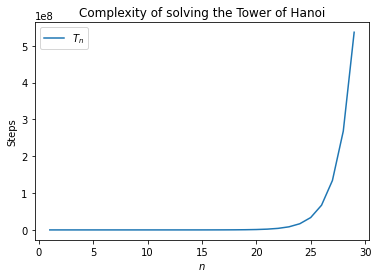

In [19]:
f,ax = plt.subplots()
ax.plot(range(1,30),steps,label='$T_n$')
ax.set_xlabel('$n$')
ax.set_ylabel('Steps')
ax.set_title('Complexity of solving the Tower of Hanoi')
ax.legend(loc=0);

### Straightforward Complexity Analysis
To analyze the number of steps it would take:
\begin{align*}
    \text{to move $n$ disks }T_n &= 2 T_{n-1} + 1\\
    &= 2(2T_{n-2}+1) +1 = 2^{2} T_{n-2} + (1+2)\\
    &= 2^{2}(2T_{n-3}+1) +(1+2) = 2^{3} T_{n-3} + (1+2+4)\\
    &= \vdots \qquad \vdots \qquad \vdots\\
    &= 2^{i-1}(2T_{n-i}+1) +(1+2+ \cdots + 2^{i-2}) = 2^{i} T_{n-i} + \sum_{j=0}^{i-1} 2^j\\
    &= 2^{n-1} T_{1} + \sum_{j=0}^{n-2} 2^j\\
    &= 2^{n-1} + \sum_{j=0}^{n-2} 2^j\\
    &= \sum_{j=0}^{n-1} 2^j = \boxed{2^n -1}
\end{align*}
Then, from our direct proof, we know that $$T(n) = \Theta(2^n)$$

<div class="alert alert-block alert-info">
<b>Funny Note:</b> think of the myth that the world ends after moving the 64th golden disk in a temple; check how much it takes if that is the case.
</div>

### Complexity Analysis using Recursion Tree
<center><img src="./images/hanoi.svg"></center>

## References and Further Readings
- Introduction to Algorithms 3rd Edition [CLRS]
    - Ch 4 for Divide and Conquer along with its related Complexity Analysis
    
#### <small>image source: wikipedia</small>